## load packages and data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import scanpy as sc
from anndata import AnnData
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "/home/nas2/biod/yangchenghui/my_ych_project_PBMC/aggPBMC_in_scAI,scAI_MOJITOO_MultiVI_GLUE/"
file_pdf_path = "/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC_in_scAI,scAI_MOJITOO_MultiVI_GLUE_pdf/"

In [34]:
raw_data_path = "/home/nas2/biod/yangchenghui/my_ych_project_PBMC/pbmc_data/"
RNA_raw_data = pd.read_table(raw_data_path+'PBMC_RNA_agg_count.txt', sep='\t', index_col=0)
ATAC_raw_data = pd.read_csv(raw_data_path+'PBMC_ATAC_agg_count.txt', sep='\t', index_col=0)
ATAC_raw_data = ATAC_raw_data.drop(ATAC_raw_data.index[-1]) #最后一行是nan

In [37]:
RNA_raw_data

,Agg_1,Agg_2,Agg_3,Agg_4,Agg_5,Agg_6,Agg_7,Agg_8,Agg_9,Agg_10,...,Agg_3192,Agg_3193,Agg_3194,Agg_3195,Agg_3196,Agg_3197,Agg_3198,Agg_3199,Agg_3200,Agg_3201
MIR1302-2HG,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.779049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC023491.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.4,0.0,0.959696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
ATAC_raw_data

,Agg_1,Agg_2,Agg_3,Agg_4,Agg_5,Agg_6,Agg_7,Agg_8,Agg_9,Agg_10,...,Agg_3192,Agg_3193,Agg_3194,Agg_3195,Agg_3196,Agg_3197,Agg_3198,Agg_3199,Agg_3200,Agg_3201
chr1:10109-10357,1.192063,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.63596,0.000000,0.000000,0.0,0.0
chr1:180730-181630,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.764265,0.00000,0.000000,0.000000,0.0,0.0
chr1:191491-191736,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
chr1:267816-268196,0.000000,0.0,0.86899,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
chr1:586028-586373,0.767714,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr22:29117740-29118744,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.59682,0.000000,0.000000,0.0,0.0
chr22:29152176-29153361,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.678612,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.546719,0.000000,0.0,0.0
chr22:29154359-29154890,0.000000,0.0,0.00000,0.585565,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.686091,0.00000,0.000000,0.629738,0.0,0.0
chr22:29167165-29167941,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0


In [7]:
celltype = pd.read_csv(raw_data_path+'PBMC_agg_label.txt', sep='\t', index_col=0)
cell_names = list(RNA_raw_data.columns)
celltype = celltype.loc[cell_names]
celltype

,metas
Agg_1,CD4 Naive
Agg_2,CD4 Naive
Agg_3,CD4 Naive
Agg_4,CD4 Naive
Agg_5,CD4 Naive
...,...
Agg_3197,CD8 TEM_2
Agg_3198,CD8 TEM_2
Agg_3199,CD8 TEM_2
Agg_3200,CD8 TEM_2


In [8]:
X1 = ATAC_raw_data.T
X2 = RNA_raw_data.T
(n1, d1) = X1.shape
(n2, d2) = X2.shape
print("Dimensions of input datasets are: ", "X1 = ", X1.shape, " X2 = ", X2.shape)
basic_labels1 = np.array(celltype['metas'])
basic_labels2 = np.array(celltype['metas'])
print("Dimensions of basic_labels are: ", "basic_labels1 = ", basic_labels1.shape, " basic_labels2 = ", basic_labels2.shape)
cell_names1 = list(ATAC_raw_data.columns)
cell_names2 = list(RNA_raw_data.columns)
peak_names = list(ATAC_raw_data.index)
gene_names = list(RNA_raw_data.index)

Dimensions of input datasets are:  X1 =  (3197, 65211)  X2 =  (3197, 36601)
Dimensions of basic_labels are:  basic_labels1 =  (3197,)  basic_labels2 =  (3197,)


In [7]:
# FGOT中使用的数据，正则化过，特征筛选过
data_path = "/home/nas2/biod/yangchenghui/FGOT-master/data/PBMC_data/"
RNA_data = pd.read_csv(data_path+'feature_selected_RNA_normalized.txt', sep='\t', index_col=0)
ATAC_data = pd.read_csv(data_path+'feature_250kb_ATAC_normalized.txt', sep='\t', index_col=0)

# RNA_cluster = pd.read_csv(data_path+'label.txt', sep='\t').rename(columns={'Unnamed: 0': 'cell', 'metas': 'cluster'})
# ATAC_cluster = RNA_cluster.copy()

# scAI

在R中运行代码 PBMC_embedding&cost_from_scAI.R

In [8]:
X_aligned = pd.read_csv(file_path + "aggPBMC_scAI_embedding.txt", sep=',', index_col=0)
X_aligned

,Agg_1,Agg_2,Agg_3,Agg_4,Agg_5,Agg_6,Agg_7,Agg_8,Agg_9,Agg_10,...,Agg_3192,Agg_3193,Agg_3194,Agg_3195,Agg_3196,Agg_3197,Agg_3198,Agg_3199,Agg_3200,Agg_3201
factor1,5.800783e-04,2.331706e-04,2.483082e-04,5.054466e-04,2.599780e-04,5.825186e-04,2.549850e-04,4.420060e-04,4.828584e-19,2.178411e-04,...,2.868001e-04,4.492566e-04,7.821109e-05,1.421665e-04,1.202669e-11,8.261636e-23,1.076087e-04,1.735361e-20,6.396487e-04,1.491950e-04
factor2,5.327263e-04,1.876869e-04,3.639217e-07,6.702362e-04,2.054230e-04,3.660143e-04,3.154112e-04,1.476216e-04,7.029332e-04,1.872759e-04,...,3.463672e-04,5.547624e-05,3.869733e-37,4.992614e-04,1.175563e-04,3.671363e-05,1.373973e-04,8.125389e-05,1.437349e-20,2.689631e-58
factor3,2.681941e-04,4.552487e-14,5.746400e-05,9.653732e-27,7.849182e-30,2.295242e-04,6.111395e-08,9.926116e-10,2.739785e-21,1.698934e-06,...,3.452768e-04,1.467108e-04,1.708918e-32,3.856011e-04,8.265832e-05,5.498686e-04,2.605588e-10,7.560636e-06,3.617976e-04,3.950392e-42
factor4,5.889027e-08,1.027195e-15,3.972748e-16,1.311495e-07,4.418540e-15,3.041492e-25,1.736454e-04,3.663831e-05,9.717087e-10,1.070564e-04,...,7.736455e-07,1.418100e-22,2.589560e-04,1.022824e-04,3.526873e-15,7.917850e-19,1.946297e-06,2.751782e-04,5.988921e-20,9.137329e-05
factor5,4.299618e-27,1.609554e-24,3.203435e-33,1.548791e-25,3.413580e-41,7.437492e-17,6.812682e-38,2.631930e-21,3.894538e-18,1.753541e-23,...,1.654687e-13,8.113597e-17,5.267140e-27,2.895915e-07,1.960609e-38,3.100186e-29,7.411399e-04,1.511658e-16,3.428339e-06,3.733530e-30
factor6,6.062174e-05,5.696441e-10,8.644800e-12,4.359427e-07,6.906381e-13,7.836336e-05,1.168797e-04,7.359442e-05,2.460642e-06,2.304765e-04,...,4.735744e-09,1.854090e-04,3.055361e-04,6.274002e-06,8.384654e-09,4.321010e-04,5.080320e-04,3.907066e-04,4.573519e-06,3.578941e-04
factor7,1.980854e-04,5.221332e-04,3.749660e-04,5.104659e-04,9.793802e-05,2.138220e-04,4.566985e-04,3.737133e-04,6.061626e-04,4.952977e-04,...,2.409731e-04,3.658342e-04,4.016723e-04,2.182652e-04,6.238119e-04,2.112965e-04,1.022207e-03,9.776822e-06,5.014832e-04,5.164954e-04
factor8,2.198455e-04,2.845866e-08,4.098234e-04,4.603639e-04,2.607507e-04,4.223170e-04,1.696045e-04,5.890535e-04,3.310767e-04,1.553188e-04,...,7.196826e-13,1.382360e-04,3.698457e-04,4.805093e-04,3.574459e-04,3.757248e-04,3.506566e-04,4.633736e-07,6.230075e-04,4.746800e-04
factor9,2.945415e-04,6.510528e-04,2.751072e-04,4.846682e-04,1.602793e-03,5.457519e-04,1.412938e-03,1.075927e-03,7.082670e-04,9.011130e-04,...,1.708058e-04,6.451788e-23,5.177428e-10,5.741878e-05,1.753660e-04,1.293453e-04,3.966743e-04,9.142974e-16,1.377446e-04,6.554624e-23
factor10,2.541152e-05,2.568604e-16,1.012008e-37,2.373566e-31,1.967043e-15,2.206380e-15,2.023287e-12,2.975672e-25,1.284880e-24,5.940602e-36,...,5.504296e-10,8.972263e-06,1.475113e-26,1.621674e-09,5.428321e-14,7.024250e-13,2.423765e-04,1.990701e-07,5.055965e-27,5.234767e-23


In [9]:
# 建立 adata_aligned
adata_aligned = AnnData(X_aligned.T)
adata_aligned.obs['label'] = basic_labels1
adata_aligned

AnnData object with n_obs × n_vars = 3197 × 30
    obs: 'label'

/home/yangchenghui/anaconda3/envs/MOJITOO/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


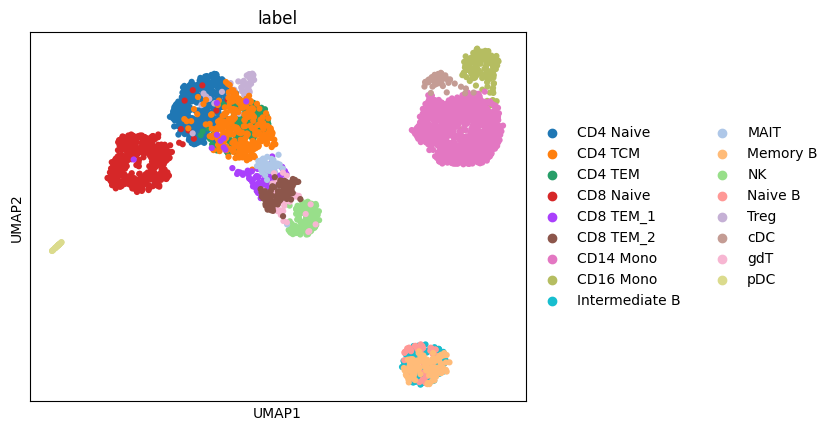

In [10]:
sc.pp.scale(adata_aligned)
sc.tl.pca(adata_aligned)
sc.pp.neighbors(adata_aligned, n_neighbors=15, n_pcs=2)
sc.tl.umap(adata_aligned)
sc.pl.umap(adata_aligned, color=[ 'label'],s = 80, show=False)
pl.savefig(file_pdf_path + "aggPBMC_scAI_embedding.pdf")
adata_aligned.write_h5ad(file_path + "aggPBMC_scAI_adata.h5ad")

<Axes: >

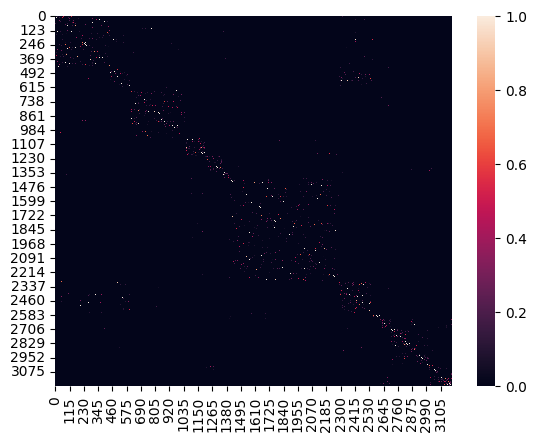

In [11]:
smi = adata_aligned.obsp['connectivities'].toarray()
np.fill_diagonal(smi, 1)
sns.heatmap(smi)

In [12]:
cost = np.array(np.exp(1 - smi))
cost = cost - np.min(cost)
cost = pd.DataFrame(cost, index = cell_names1, columns=cell_names2)

Text(0.5, 1.0, 'cost')

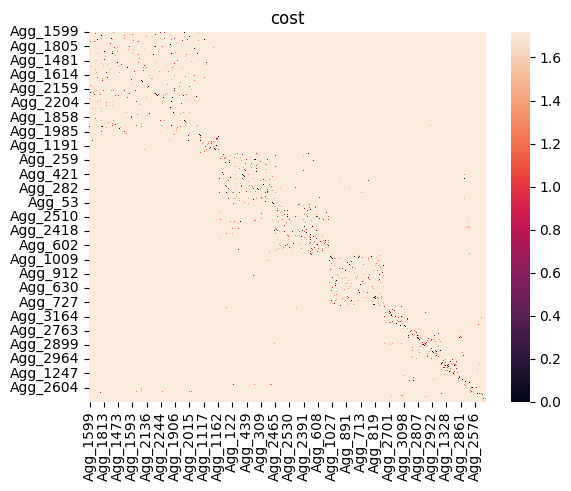

In [13]:
sorted_cols = np.argsort(basic_labels1)
sorted_cost = cost.iloc[sorted_cols,: ]
#sorted_rows = np.argsort(basic_labels2)
sorted_cost = sorted_cost.iloc[:, sorted_cols]
sns.heatmap(sorted_cost)
pl.title('cost')

<Axes: >

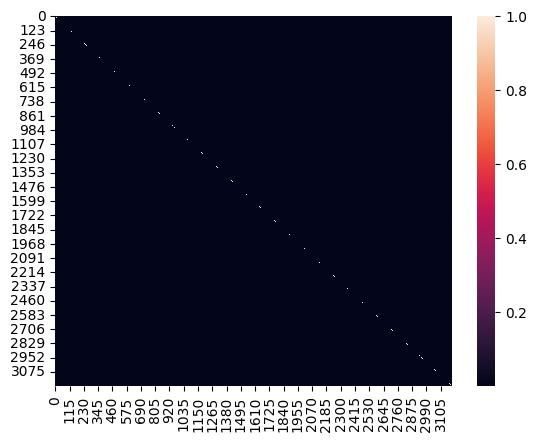

In [17]:
smi2 = pd.read_csv(file_path + "aggPBMC_scAI_cell_smi.txt", sep=',', index_col=0)
smi2 = np.array(smi2)
np.fill_diagonal(smi2, 1)
sns.heatmap(smi2)

In [18]:
cost = np.array(np.exp(np.max(smi2) - smi2))
cost = cost - np.min(cost)
cost = pd.DataFrame(cost, index = cell_names1, columns=cell_names2)

Text(0.5, 1.0, 'cost')

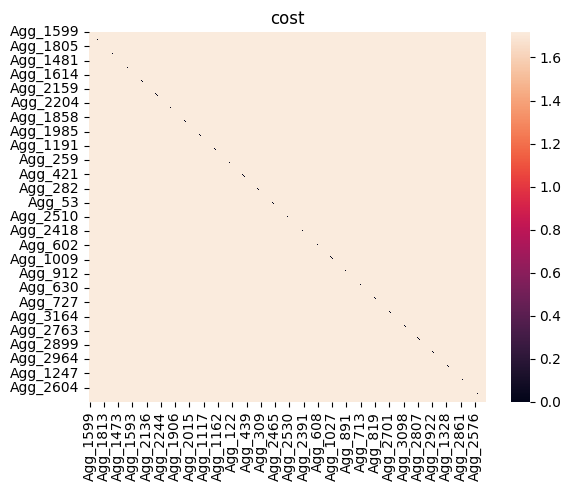

In [19]:
sorted_cols = np.argsort(basic_labels1)
sorted_cost = cost.iloc[sorted_cols,: ]
#sorted_rows = np.argsort(basic_labels2)
sorted_cost = sorted_cost.iloc[:, sorted_cols]
sns.heatmap(sorted_cost)
pl.title('cost')

# MOJITOO

In [ ]:
# git clone https://github.com/CostaLab/MOJITOO.git
# cd pymojitoo
# pip install .

In [8]:
import mojitoo
import scanpy
import scanpy as sc
import episcanpy as epi

In [9]:
atac = AnnData(ATAC_raw_data.T)
rna = AnnData(RNA_raw_data.T)
atac, rna

(AnnData object with n_obs × n_vars = 3197 × 65211,
 AnnData object with n_obs × n_vars = 3197 × 36601)


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



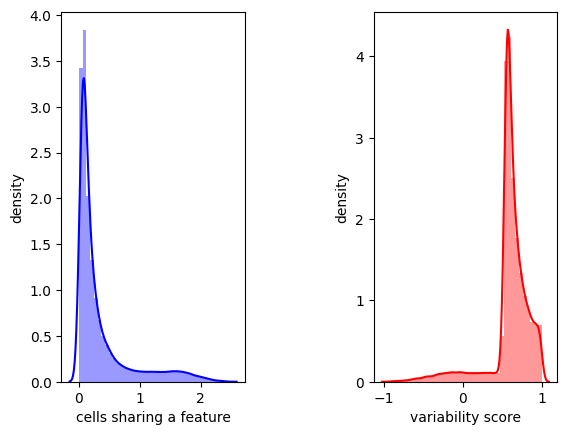


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



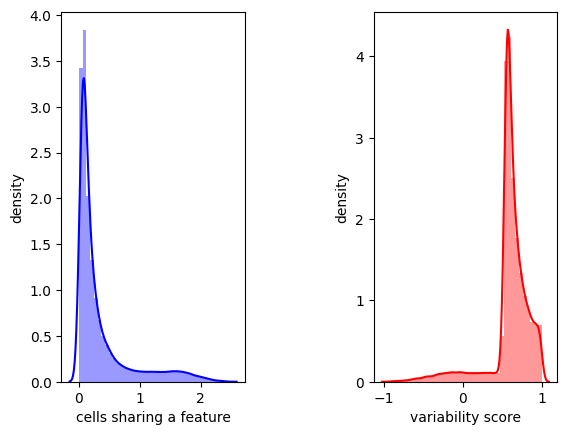

In [10]:
epi.pp.cal_var(atac)
epi.pp.select_var_feature(atac, nb_features=5000)
epi.tl.tfidf(atac)
epi.tl.lsi(atac, n_components=50)

In [11]:
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)
sc.pp.scale(rna, max_value=10)
sc.tl.pca(rna, svd_solver='arpack')

In [12]:
mdata = AnnData(X=np.empty((3197, 0)))
mdata.mod = {'atac': atac, 'rna': rna}
mdata.obsm["rna_pca"] = rna.obsm["X_pca"]
mdata.obsm["atac_lsi"] = atac.obsm["X_lsi"]
mdata

AnnData object with n_obs × n_vars = 3197 × 0
    obsm: 'rna_pca', 'atac_lsi'

1 round cc 46


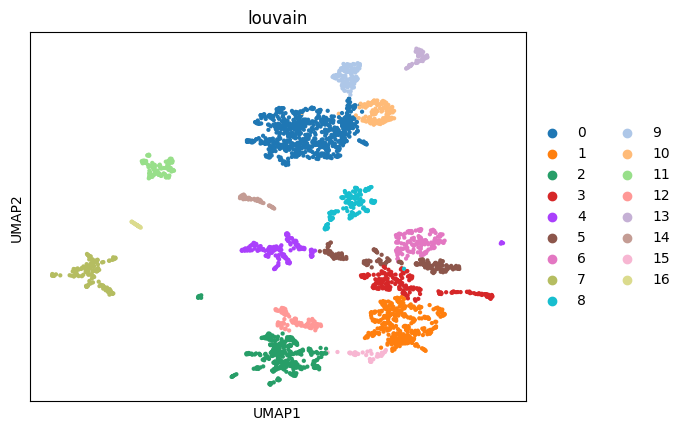

In [13]:
mojitoo.mojitoo(mdata, reduction_list=["rna_pca", "atac_lsi"],  dims_list=(range(50), range(1,50)),reduction_name='mojitoo', overwrite=True)

sc.pp.neighbors(mdata, use_rep='mojitoo')
sc.tl.louvain(mdata, resolution=0.5)
sc.tl.umap(mdata)
sc.pl.embedding(mdata, color='louvain', basis='umap')

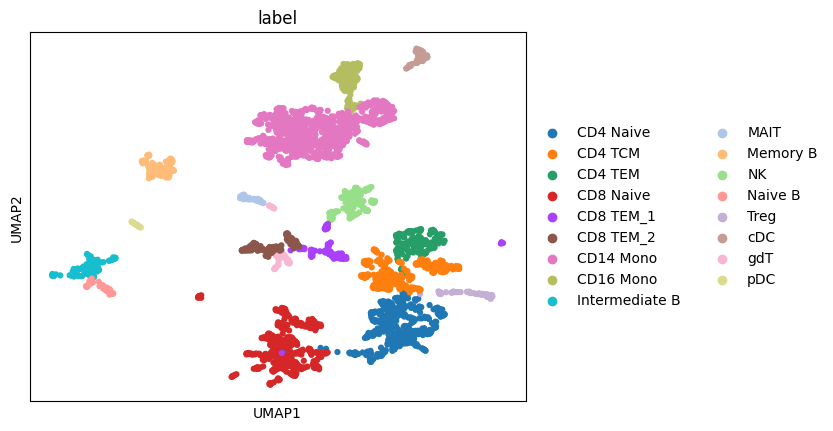

In [16]:
mdata.obs['label'] = np.array(celltype['metas'])
sc.pl.umap(mdata, color=['label'],s = 80, show=False)
pl.savefig(file_pdf_path + "aggPBMC_MOJITOO_embedding.pdf")
mdata.write_h5ad(file_path + "aggPBMC_MOJITOO_adata.h5ad")

<Axes: >

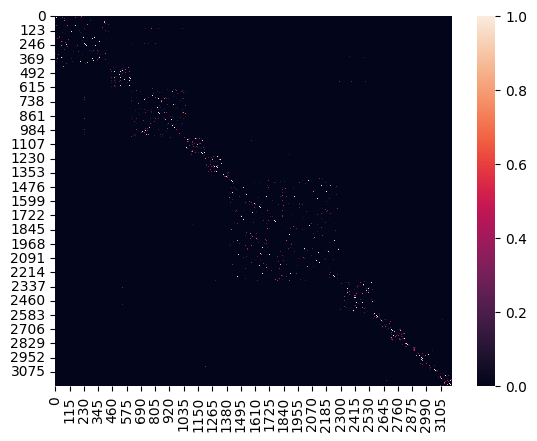

In [17]:
smi = mdata.obsp['connectivities'].toarray()
np.fill_diagonal(smi, 1)
sns.heatmap(smi)

In [18]:
cost = np.array(np.exp(1 - smi))
cost = cost - np.min(cost)
cost = pd.DataFrame(cost, index = cell_names1, columns=cell_names2)

Text(0.5, 1.0, 'cost')

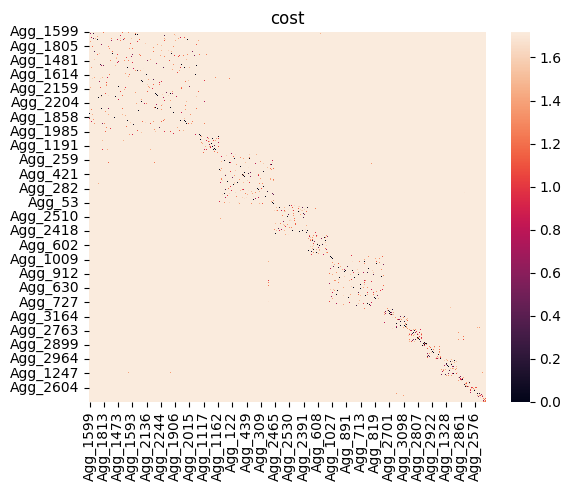

In [19]:
sorted_cols = np.argsort(basic_labels1)
sorted_cost = cost.iloc[sorted_cols,: ]
#sorted_rows = np.argsort(basic_labels2)
sorted_cost = sorted_cost.iloc[:, sorted_cols]
sns.heatmap(sorted_cost)
pl.title('cost')

# MultiVI

In [1]:
import tempfile
from pathlib import Path
import numpy as np
import scanpy as sc
import scvi
import seaborn as sns
import torch

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/

In [2]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.2.1


In [3]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = tempfile.TemporaryDirectory()

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [10]:
df_combined = pd.concat([RNA_raw_data, ATAC_raw_data], axis=0)
df_combined.shape

(101812, 3197)

In [17]:
adata_mvi = AnnData(df_combined.T)
adata_mvi.var['modality'] = np.concatenate([['Gene Expression']*36601, ['Peaks']*65211])
adata_mvi.var_names_make_unique()
adata_mvi

AnnData object with n_obs × n_vars = 3197 × 101812
    var: 'modality'

In [18]:
sc.pp.filter_genes(adata_mvi, min_cells=int(adata_mvi.shape[0] * 0.01))

In [19]:
adata_mvi

AnnData object with n_obs × n_vars = 3197 × 86320
    var: 'modality', 'n_cells'

In [20]:
# 设置 AnnData 对象
scvi.model.MULTIVI.setup_anndata(adata_mvi)

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [21]:
# 创建 MultiVI 模型，并指定基因和基因组区域数量
model = scvi.model.MULTIVI(
    adata_mvi,
    n_genes=(adata_mvi.var["modality"] == "Gene Expression").sum(),
    n_regions=(adata_mvi.var["modality"] == "Peaks").sum(),
)

# 训练模型
model.train()

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
/tmp/ipykernel_3291643/3849262284.py:9: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train()
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/model/_multivi.py:343: UserWarning: Disabling adversarial classifier.
  training_plan = self._training_plan_cls(self.module, **plan_kwargs)
Trainer will use only 1 of 10 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=10)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), use

Training:   0%|          | 0/500 [00:00<?, ?it/s]

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/module/_multivae.py:870: UserWarning: The value argument must be within the support of the distribution
  .log_prob(x)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/module/_multivae.py:870: UserWarning: The value argument must be within the support of the distribution
  .log_prob(x)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/module/_multivae.py:870: UserWarning: The value argument must be within the support of the distribution
  .log_prob(x)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/module/_multivae.py:870: UserWarning: The value argument must be within the support of the distribution
  .log_prob(x)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/module/_multivae.py:870: UserWarning: The value argument must be within the support of the distribution
  .log_prob(x)
/home/yangchenghui/a

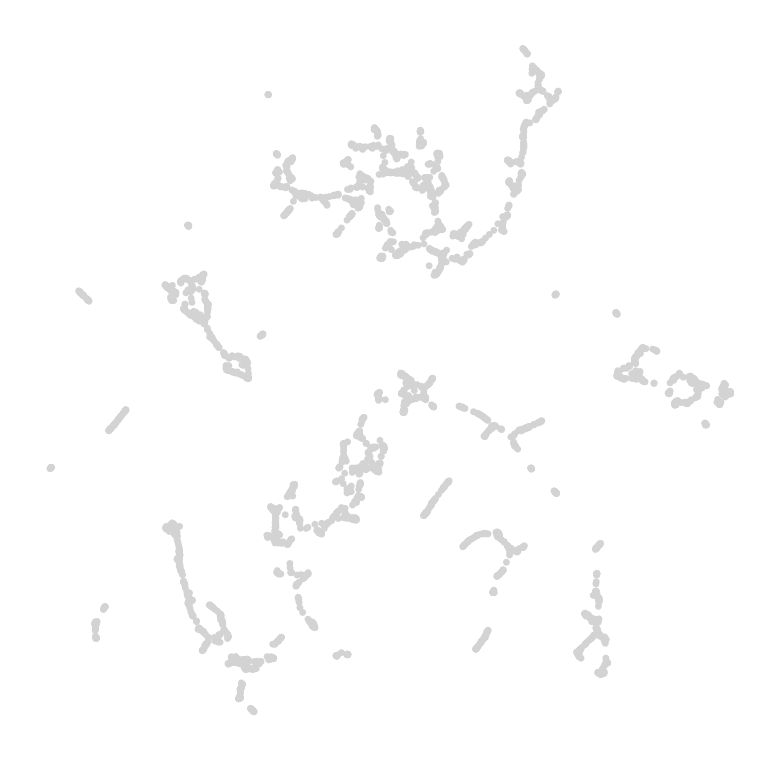

In [22]:
import scanpy as sc

# 提取潜在表示
MULTIVI_LATENT_KEY = "X_multivi"
adata_mvi.obsm[MULTIVI_LATENT_KEY] = model.get_latent_representation()

# 进行 UMAP 降维
sc.pp.neighbors(adata_mvi, use_rep=MULTIVI_LATENT_KEY)
sc.tl.umap(adata_mvi, min_dist=0.2)
sc.pl.umap(adata_mvi)

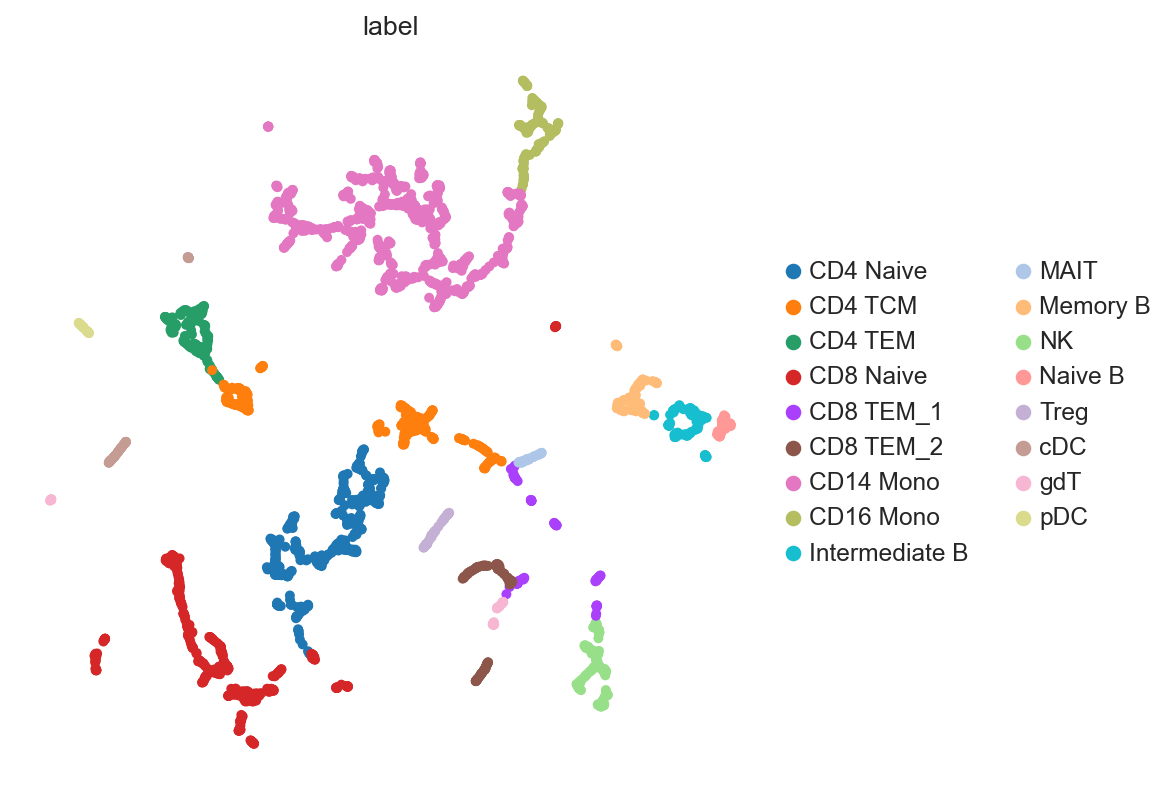

In [24]:
adata_mvi.obs['label'] = np.array(celltype['metas'])
sc.pl.umap(adata_mvi, color=['label'],s = 80, show=False)
pl.savefig(file_pdf_path + "aggPBMC_MultiVI_embedding.pdf")
adata_mvi.write_h5ad(file_path + "aggPBMC_MultiVI_adata.h5ad")

<Axes: >

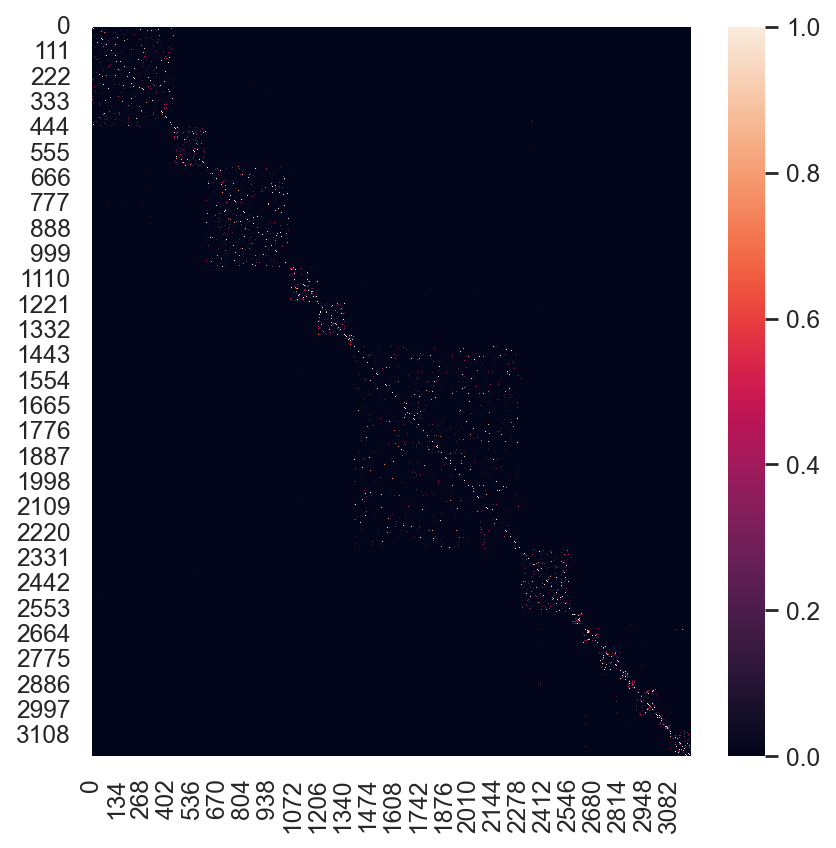

In [25]:
smi = adata_mvi.obsp['connectivities'].toarray()
np.fill_diagonal(smi, 1)
sns.heatmap(smi)

In [26]:
cost = np.array(np.exp(1 - smi))
cost = cost - np.min(cost)
cost = pd.DataFrame(cost, index = cell_names1, columns=cell_names2)

Text(0.5, 1.0, 'cost')

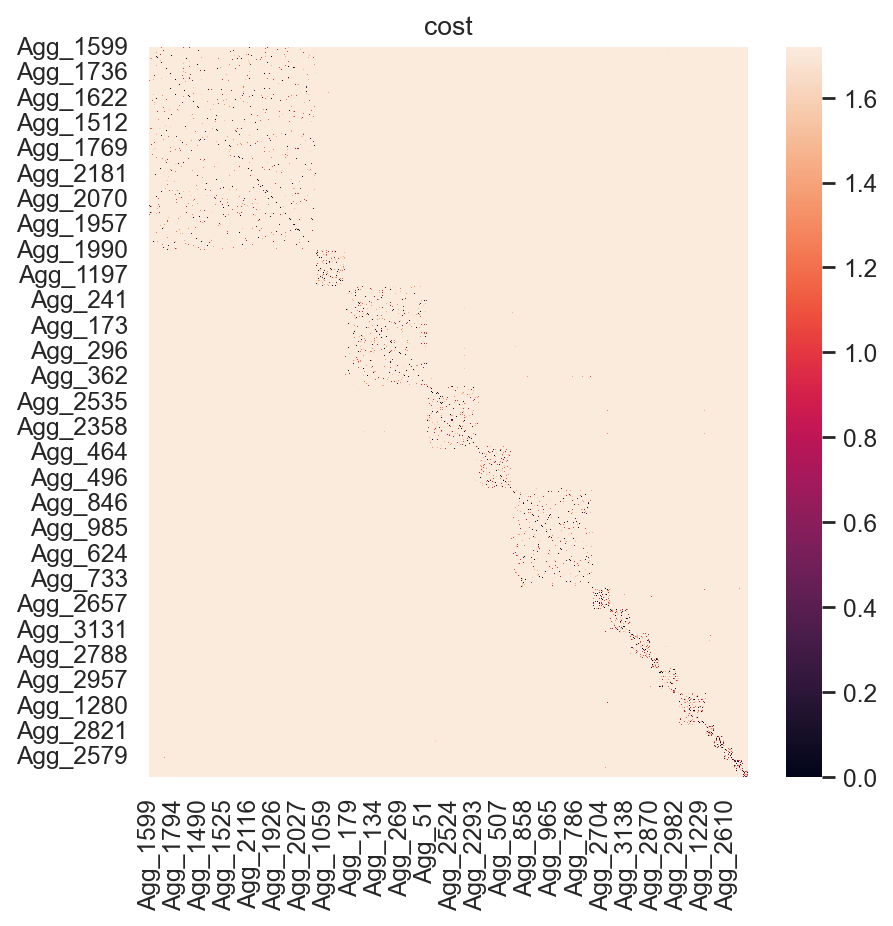

In [27]:
sorted_cols = np.argsort(basic_labels1)
sorted_cost = cost.iloc[sorted_cols,: ]
#sorted_rows = np.argsort(basic_labels2)
sorted_cost = sorted_cost.iloc[:, sorted_cols]
sns.heatmap(sorted_cost)
pl.title('cost')

# GLUE

In [1]:
import anndata as ad
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer


In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [39]:
atac = AnnData(ATAC_raw_data.T)
atac.obs["cell_type"] = basic_labels1
atac.obs["domain"] = "scATAC-seq"
rna = AnnData(RNA_raw_data.T)
rna.obs["cell_type"] = basic_labels2
rna.obs["domain"] = "scRNA-seq"
atac, rna

(AnnData object with n_obs × n_vars = 3197 × 65211
     obs: 'cell_type', 'domain',
 AnnData object with n_obs × n_vars = 3197 × 36601
     obs: 'cell_type', 'domain')

In [40]:
# 将数据矩阵取整
rna.X = np.round(rna.X)
atac.X = np.round(atac.X)
rna.X[rna.X < 0] = 0
atac.X[atac.X < 0] = 0
rna.X = rna.X.astype(int)
atac.X = atac.X.astype(int)

In [41]:
np.unique(rna.X)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [42]:
np.unique(atac.X)

array([0, 1, 2, 3, 4])

Preprocess scRNA-seq data

In [43]:
rna.layers["counts"] = rna.X.copy()

In [44]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")

In [45]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


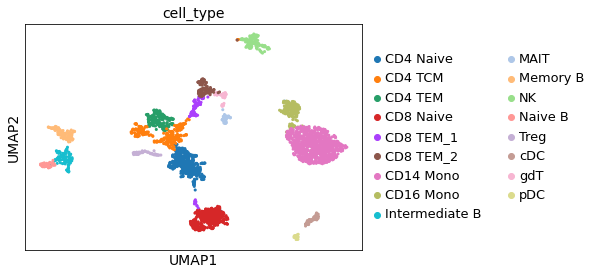

In [46]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)
sc.pl.umap(rna, color="cell_type")

Preprocess scATAC-seq data

In [47]:
atac.X, atac.X.data

(array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 <memory at 0x7529daa37790>)

In [48]:
scglue.data.lsi(atac, n_components=100, n_iter=15)

In [49]:
sc.pp.neighbors(atac, use_rep="X_lsi", metric="cosine")
sc.tl.umap(atac)

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


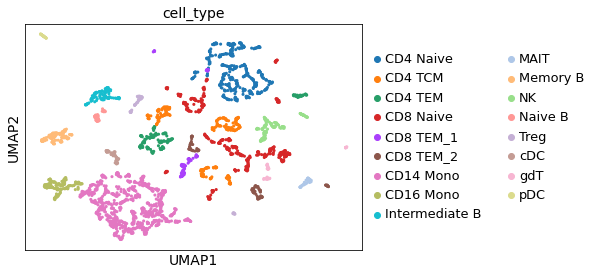

In [50]:
sc.pl.umap(atac, color="cell_type")

Construct prior regulatory graph

In [51]:
scglue.data.get_gene_annotation(
    rna, 
    gtf="/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC_in_scAI,scAI_MOJITOO_MultiVI_GLUE/gencode.v40.chr_patch_hapl_scaff.annotation.gtf.gz",
    gtf_by="gene_name"
)
df_new = rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]]

# 计算所有列都非 NaN 的行数
non_nan_row_count = df_new.dropna().shape[0]
print(f"Number of rows without NaN: {non_nan_row_count}")

Number of rows without NaN: 23582


In [52]:
# scglue.data.get_gene_annotation(
#     rna, 
#     gtf="/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC_in_scAI,scAI_MOJITOO_MultiVI_GLUE/gencode.v47.annotation.gtf.gz",
#     gtf_by="gene_name"
# )
# df_new = rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]]

# # 计算所有列都非 NaN 的行数
# non_nan_row_count = df_new.dropna().shape[0]
# print(f"Number of rows without NaN: {non_nan_row_count}")

In [53]:
# promoters = pd.read_csv('/home/nas2/biod/yangchenghui/FGOT-master/data/PBMC_data/hg38.promoter.regions.txt', sep = '\t')
# promoters

# rna_genes = rna.var_names
# filtered_promoters = promoters[promoters["genes"].isin(rna_genes)]
# filtered_promoters = filtered_promoters.drop_duplicates(subset="genes")
# filtered_promoters = filtered_promoters.set_index("genes")
# position_info = filtered_promoters.reindex(rna_genes)

# rna.var["chrom"] = position_info["chr"]
# rna.var["chromStart"] = position_info["starts"]
# rna.var["chromEnd"] = position_info["ends"]

# df = rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]]

# # 计算所有列都非 NaN 的行数
# non_nan_row_count = df.dropna().shape[0]
# print(f"Number of rows without NaN: {non_nan_row_count}")

In [54]:
genes_selected = rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].dropna().index
genes_selected

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'OR4F29', 'OR4F16', 'LINC01409',
       'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C',
       ...
       'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5',
       'MT-ND6', 'MT-CYB', 'MAFIP'],
      dtype='object', length=23582)

In [55]:
rna = rna[:, genes_selected]
rna

View of AnnData object with n_obs × n_vars = 3197 × 23582
    obs: 'cell_type', 'domain'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id', 'havana_gene', 'tag'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [56]:
atac.var_names[:5]

Index(['chr1:10109-10357', 'chr1:180730-181630', 'chr1:191491-191736',
       'chr1:267816-268196', 'chr1:586028-586373'],
      dtype='object')

In [57]:
split = atac.var_names.str.split(r"[:-]")
atac.var["chrom"] = split.map(lambda x: x[0])
atac.var["chromStart"] = split.map(lambda x: x[1]).astype(int)
atac.var["chromEnd"] = split.map(lambda x: x[2]).astype(int)
atac.var.head()

,chrom,chromStart,chromEnd
chr1:10109-10357,chr1,10109,10357
chr1:180730-181630,chr1,180730,181630
chr1:191491-191736,chr1,191491,191736
chr1:267816-268196,chr1,267816,268196
chr1:586028-586373,chr1,586028,586373


In [58]:
guidance = scglue.genomics.rna_anchored_guidance_graph(rna, atac)
guidance

window_graph: 100%|██████████| 23582/23582 [00:10<00:00, 2223.74it/s]


In [59]:
scglue.graph.check_graph(guidance, [rna, atac])

[INFO] check_graph: Checking variable coverage...


[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] check_graph: All checks passed!


In [60]:
atac.var.head()

,chrom,chromStart,chromEnd,highly_variable
chr1:10109-10357,chr1,10109,10357,False
chr1:180730-181630,chr1,180730,181630,False
chr1:191491-191736,chr1,191491,191736,False
chr1:267816-268196,chr1,267816,268196,False
chr1:586028-586373,chr1,586028,586373,False


In [61]:
rna.write(file_path+"GLUE-rna-pp.h5ad", compression="gzip")
atac.write(file_path+"GLUE-atac-pp.h5ad", compression="gzip")
nx.write_graphml(guidance, file_path+"GLUE-guidance.graphml.gz")

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: T

Configure data

In [62]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [63]:
scglue.models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)

In [64]:
from itertools import chain
guidance_hvf = guidance.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
)).copy()

Train GLUE model

In [66]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, guidance_hvf,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 10023
[INFO] SCGLUEModel: Setting `max_epochs` = 534
[INFO] SCGLUEModel: Setting `patience` = 45
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 23
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.608, 'g_kl': 0.013, 'g_elbo': 0.62, 'x_rna_nll': 0.946, 'x_rna_kl': 0.02, 'x_rna_elbo': 0.966, 'x_atac_nll': 0.551, 'x_atac_kl': 0.006, 'x_atac_elbo': 0.557, 'dsc_loss': 0.688, 'vae_loss': 1.548, 'gen_loss': 1.513}, val={'g_nll': 0.61, 'g_kl': 0.013, 'g_elbo': 0.623, 'x_rna_nll': 0.911, 'x_rna_kl': 0.017, 'x_rna_elbo': 0.928, 'x_atac_nll': 0.544, 'x_atac_kl': 0.006, 'x_atac_elbo': 0.55, 'dsc_loss': 0.696, 'vae_loss': 1.503, 'gen_loss': 1.468}, 53.6s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.597, 'g_kl': 0.02, 'g_elbo': 0.617, 'x_rna_nll': 0.866, 'x_rna_kl': 0.014, 'x_rna_elbo': 0.88, 'x_atac_nll': 0.521, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.524, 'dsc_loss': 0.686, 'vae_loss': 1.428, 'gen_loss': 1.394}, val={'g_nll': 0.596, 'g_kl': 0.02, 'g_elbo': 0.617, 'x_rna_nll': 0.862, 'x_rna_kl': 0.013, 'x_rna_elbo': 0.874, 'x_atac_nll': 0.527, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.531, 'dsc_loss': 0.69, 'vae_loss': 1.429, 'gen_los

2024-12-13 02:44:52,400 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "149"...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scglue/models/plugins.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded = torch.load(direct

[INFO] EarlyStopping: Restoring checkpoint "149"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (22, 38)...
[INFO] estimate_balancing_weight: Estimating balancing weight...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 10023
[INFO] SCGLUEModel: Setting `align_burnin` = 89
[INFO] SCGLUEModel: Setting `max_epochs` = 534
[INFO] SCGLUEModel: Setting `patience` = 45
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 23
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.481, 'g_kl': 0.022, 'g_elbo': 0.504, 'x_rna_nll': 0.794, 'x_rna_kl': 0.014, 'x_rna_elbo': 0.808, 'x_atac_nll': 0.492, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.495, 'dsc_loss': 0.693, 'vae_loss': 1.323, 'gen_loss': 1.289}, val={'g_nll': 0.48, 'g_kl': 0.022, 'g_elbo': 0.503, 'x_rna_nll': 0.803, 'x_rna_kl': 0.013, 'x_rna_elbo': 0.816, 'x_atac_nll': 0.508, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.511, 'dsc_loss': 0.664, 'vae_loss': 1.348, 'gen_loss': 1.314}, 42.2s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.479, 'g_kl': 0.022, 'g_elbo': 0.502, 'x_rna_nll': 0.794, 'x_rna_kl': 0.014, 'x_rna_elbo': 0.808, 'x_atac_nll': 0.497, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.501, 'dsc_loss': 0.69, 'vae_loss': 1.328, 'gen_loss': 1.294}, val={'g_nll': 0.48, 'g_kl': 0.022, 'g_elbo': 0.503, 'x_rna_nll': 0.803, 'x_rna_kl': 0.013, 'x_rna_elbo': 0.817, 'x_atac_nll': 0.5, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.503, 'dsc_loss': 0.674, 'vae_loss': 1.34, 'gen_l

2024-12-13 05:12:29,164 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "202"...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scglue/models/plugins.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded = torch.load(direct

[INFO] EarlyStopping: Restoring checkpoint "202"...


In [67]:
glue.save(file_path+"glue.dill")
# glue = scglue.models.load_model(file_path+"glue.dill")

Check integration diagnostics

In [68]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "atac": atac}, guidance_hvf
)
dx

[INFO] integration_consistency: Using layer "counts" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "atac"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "rna"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "atac"
[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 10 common metacells...
[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 20 common metacells...
[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 50 common metacells...
[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 100 common metacells...
[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 198 common metacells...


,n_meta,consistency
0,10,0.453118
1,20,0.431033
2,50,0.406189
3,100,0.367242
4,200,0.331998


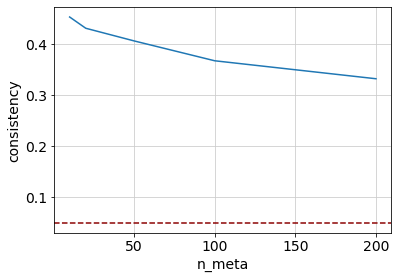

In [69]:
_ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

Apply model for cell and feature embedding

In [70]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [71]:
combined = ad.concat([rna, atac])

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


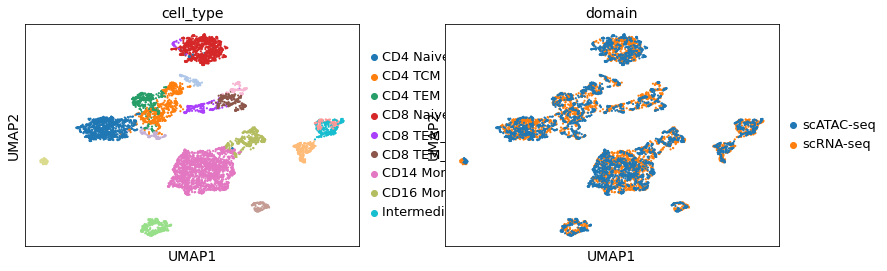

In [72]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"])

In [73]:
combined.write(file_path+"GLUE-combined.h5ad", compression="gzip")

In [74]:
feature_embeddings = glue.encode_graph(guidance_hvf)
feature_embeddings = pd.DataFrame(feature_embeddings, index=glue.vertices)
feature_embeddings.iloc[:5, :5]


,0,1,2,3,4
A2M,-1.499106,0.000109,-0.069369,-0.102408,0.001350
A2M-AS1,-1.384070,-0.000314,-0.111891,-0.071130,0.001702
AATBC,0.769320,0.001200,0.094691,-0.050345,-0.001292
ABCA1,0.787722,0.000664,-0.178059,-0.406427,-0.000265
ABCB1,-1.336096,0.000008,-0.112359,-0.640367,0.001523


In [75]:
rna.varm["X_glue"] = feature_embeddings.reindex(rna.var_names).to_numpy()
atac.varm["X_glue"] = feature_embeddings.reindex(atac.var_names).to_numpy()

In [76]:
rna.write(file_path+"GLUE-rna-emb.h5ad", compression="gzip")
atac.write(file_path+"GLUE-atac-emb.h5ad", compression="gzip")
nx.write_graphml(guidance_hvf, file_path+"GLUE-guidance-hvf.graphml.gz")

calculate cost across modality

In [6]:
combined = ad.read(file_path + "GLUE-combined.h5ad")
combined

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 6394 × 0
    obs: 'cell_type', 'domain', 'balancing_weight'
    uns: 'cell_type_colors', 'domain_colors', 'neighbors', 'umap'
    obsm: 'X_glue', 'X_umap'
    obsp: 'connectivities', 'distances'

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


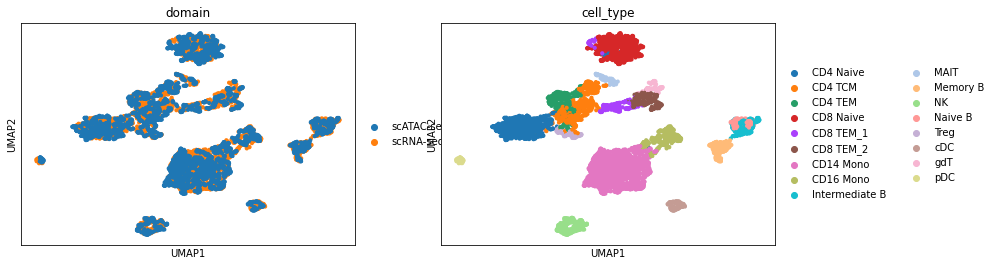

In [7]:
sc.pl.umap(combined, color=["domain", "cell_type"],s = 70, show=False)
pl.savefig(file_pdf_path + "aggPBMC_GLUE_embedding.pdf")

In [86]:
cell_names1 = combined[combined.obs["domain"] == "scATAC-seq"].obs_names
cell_names1

Index(['Agg_1', 'Agg_2', 'Agg_3', 'Agg_4', 'Agg_5', 'Agg_6', 'Agg_7', 'Agg_8',
       'Agg_9', 'Agg_10',
       ...
       'Agg_3192', 'Agg_3193', 'Agg_3194', 'Agg_3195', 'Agg_3196', 'Agg_3197',
       'Agg_3198', 'Agg_3199', 'Agg_3200', 'Agg_3201'],
      dtype='object', length=3197)

In [87]:
cell_names2 = combined[combined.obs["domain"] == "scRNA-seq"].obs_names
cell_names2

Index(['Agg_1', 'Agg_2', 'Agg_3', 'Agg_4', 'Agg_5', 'Agg_6', 'Agg_7', 'Agg_8',
       'Agg_9', 'Agg_10',
       ...
       'Agg_3192', 'Agg_3193', 'Agg_3194', 'Agg_3195', 'Agg_3196', 'Agg_3197',
       'Agg_3198', 'Agg_3199', 'Agg_3200', 'Agg_3201'],
      dtype='object', length=3197)

In [90]:
rna_emd = combined[combined.obs["domain"] == "scRNA-seq"].obsm["X_glue"]
rna_emd.shape

(3197, 50)

In [91]:
atac_emd = combined[combined.obs["domain"] == "scATAC-seq"].obsm["X_glue"]
atac_emd.shape

(3197, 50)

In [109]:
basic_labels1 = combined[combined.obs["domain"] == "scATAC-seq"].obs["cell_type"]
basic_labels2 = combined[combined.obs["domain"] == "scRNA-seq"].obs["cell_type"]

计算MNN相似度

In [151]:
import sys
sys.path.insert(1, '/home/nas2/biod/yangchenghui/FGOT-master')
from FGOT import preprocess as pre

In [177]:
S_m = pre.calculate_cell_similarity_byMNN(atac_emd, rna_emd, cell_names1, cell_names2, scale=0, knn = 40)
r = pre.check_mnn_accuracy(S_m, basic_labels1, basic_labels2)
print("The accuracy of identifying MNN pairs is:", r)

the number of MNN pairs is  90380
The accuracy of identifying MNN pairs is: 0.9111211099548545


In [178]:
rows_all_zero = np.all(S_m == 0, axis=1)

# 打印结果
print("是否有全零行:", np.any(rows_all_zero))  # 是否存在全零行
print("全零行的索引:", np.where(rows_all_zero)[0])  # 全零行的索引

是否有全零行: False
全零行的索引: []


Text(0.5, 1.0, 'S_MNN')

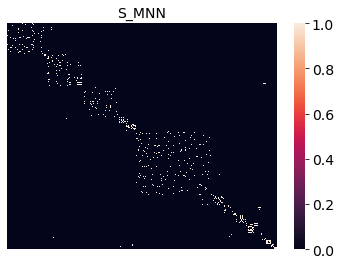

In [179]:
sorted_cols = np.argsort(basic_labels1)
sorted_S = S_m.iloc[sorted_cols,: ]
#sorted_rows = np.argsort(basic_labels2)
sorted_S = sorted_S.iloc[:, sorted_cols]
sns.heatmap(sorted_S, xticklabels=False, yticklabels=False)
pl.title('S_MNN')

In [180]:
# import snn
s_tmp = combined.obsp['connectivities'].toarray()
np.fill_diagonal(s_tmp, 1)
snn1 = s_tmp[3197:,3197:]
snn2 = s_tmp[:3197,:3197]

In [181]:
S_sm = pre.smooth_cell_similarity_byLaplacian2(S_m,snn1,snn2)
S = S_sm/np.max(S_sm) + S_m/np.max(S_m)

Text(0.5, 1.0, 'S after smooth')

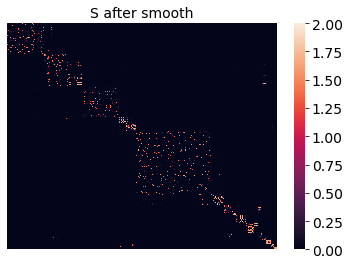

In [182]:
sorted_cols = np.argsort(basic_labels1)
sorted_S = S.iloc[sorted_cols,: ]
#sorted_rows = np.argsort(basic_labels2)
sorted_S = sorted_S.iloc[:, sorted_cols]
sns.heatmap(sorted_S, xticklabels=False, yticklabels=False)
pl.title('S after smooth')

In [183]:
# compute cost
cost = np.array(np.exp(np.max(S) - S))
cost = cost - np.min(cost)
cost = pd.DataFrame(cost, index = cell_names1, columns=cell_names2)

Text(0.5, 1.0, 'cost')

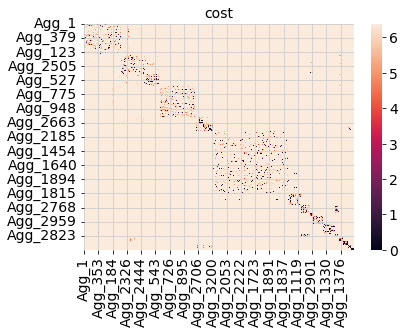

: 

In [ ]:
sorted_cols = np.argsort(basic_labels1)
sorted_cost = cost.iloc[sorted_cols,: ]
#sorted_rows = np.argsort(basic_labels2)
sorted_cost = sorted_cost.iloc[:, sorted_cols]
sns.heatmap(sorted_cost)
pl.title('cost')